## P(k) and XP(k) comparison with Disco-DJ

In [32]:
import os
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "true"
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.95"

import jax
import jax.numpy as jnp
import BFast
from BFast.core.jax_utils import show_hlo_info
from discodj import DiscoDJ
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
dim = 3
res = 512
boxsize = 1000.

In [34]:
bins = jnp.arange(1, res//3, 3)
nbins = bins.shape[0] - 1
print(nbins)

56


## Power spectrum and cross-spectrum comparison with DJ

In [35]:
bins_Pk = jnp.arange(1, res//2, 3)
nbins_Pk = bins_Pk.shape[0] - 1
f1 = jax.random.normal(jax.random.PRNGKey(1000), (res,) * dim)
f2 = jax.random.normal(jax.random.PRNGKey(2000), (res,) * dim)

In [ ]:
pk_out = BFast.Pk(f1, boxsize=boxsize, bin_edges=bins_Pk, mas_order=0, jit=True)
k, Pk0 = pk_out["k"], pk_out["Pk0"]

In [36]:
%%timeit
pk_out = BFast.Pk(f1, boxsize=boxsize, bin_edges=bins_Pk, mas_order=0, jit=True)

144 ms ± 6.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
dj = DiscoDJ(dim=3, res=res, precision="single", boxsize=boxsize)
k_dj, Pk_dj, _ = dj.evaluate_power_spectrum(f1, bins=tuple((2*bins_Pk/dj.res * dj.k_nyquist).tolist()), compute_keff=True, try_to_jit=True)

In [38]:
%%timeit
k_dj, Pk_dj, _ = dj.evaluate_power_spectrum(f1, bins=tuple((2*bins_Pk/dj.res * dj.k_nyquist).tolist()), compute_keff=True, try_to_jit=True)

138 ms ± 5.87 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [39]:
print(Pk_dj)

[7.209067  7.704761  7.153338  7.4356847 7.645921  7.438289  7.387939
 7.5195756 7.448932  7.501205  7.4938607 7.4317617 7.4476175 7.442411
 7.4326735 7.448764  7.534437  7.4777603 7.449854  7.4541416 7.4232574
 7.478239  7.47239   7.431225  7.439691  7.44543   7.471623  7.4715023
 7.414541  7.4563828 7.469325  7.447791  7.425816  7.461778  7.422283
 7.442654  7.435323  7.4283333 7.4549584 7.446307  7.426867  7.439276
 7.450617  7.4554334 7.455945  7.442336  7.454248  7.465075  7.4646077
 7.4758    7.4625506 7.4405847 7.449568  7.4450564 7.4406796 7.449733
 7.447669  7.460988  7.447725  7.4535475 7.463178  7.4462934 7.44795
 7.4281015 7.4454203 7.4298153 7.460699  7.453283  7.4477625 7.4451632
 7.4357247 7.447319  7.450792  7.4419155 7.454973  7.4481297 7.4448757
 7.4657154 7.448647  7.449962  7.444847  7.461069  7.448005  7.447616 ]


In [40]:
print(dj.k_nyquist)
print(bins_Pk.max())
print(k)
print(k_dj)

1.6084954386379742
253
[0.01846153 0.03556799 0.05408948 0.07277609 0.09151426 0.11027604
 0.1290344  0.14781399 0.16671927 0.18552162 0.20431371 0.22321306
 0.24203815 0.26085183 0.27971593 0.2985266  0.31740776 0.3362385
 0.35502508 0.37391177 0.39281568 0.4116386  0.43044358 0.44927493
 0.46815112 0.4870065  0.5058299  0.52464694 0.5435268  0.56239325
 0.5812238  0.60008276 0.6189856  0.63760906 0.65685654 0.67517775
 0.69468576 0.71278286 0.73248947 0.7503989  0.7702702  0.7879921
 0.8073388  0.82655036 0.8457915  0.86328477 0.8820233  0.9026075
 0.92124784 0.9386127  0.9568903  0.97798264 0.99768627 1.0126674
 1.0335982  1.0541754  1.0674465  1.0946813  1.107023   1.1266134
 1.1510899  1.1610243  1.1861564  1.2054441  1.2143284  1.2449133
 1.259402   1.2813953  1.3033819  1.3102887  1.3293904  1.35175
 1.3786119  1.4020314  1.4080086  1.419631   1.4339918  1.4821426
 1.4972094  1.5074584  1.5121778  1.5310009  1.5703355  1.5949523 ]
[0.01846153 0.03556796 0.05408955 0.07277578 0.0

In [42]:
print((k - k_dj) / k)

[ 2.0178666e-07  8.3789735e-07 -1.3774547e-06  4.1974477e-06
 -3.5822345e-06  3.5132759e-06  5.4276579e-06  1.7742599e-05
  2.4132262e-06  1.1967732e-05 -5.5137163e-05  3.7384241e-06
  1.0466108e-06  1.4852501e-06  2.0136997e-05 -8.1761900e-05
  1.3896143e-05 -2.5703997e-05 -4.2140025e-05 -2.6541484e-05
 -1.1759612e-05  3.2796859e-05  5.6081408e-06 -3.1774114e-05
 -2.7182658e-05 -5.9053094e-05  2.1210366e-05 -1.9995196e-05
 -2.2371201e-05 -4.5573088e-05  2.5945214e-05 -1.7084308e-04
  3.0284486e-04 -4.1085115e-04  4.0552713e-04 -5.0487288e-04
  3.5118297e-04 -2.5195442e-04  8.4774074e-04 -8.2099484e-04
  3.4713329e-04 -7.9143356e-04  2.5581592e-04  9.0046931e-04
  5.3474173e-04 -1.6366193e-03  2.9956963e-04  2.5225778e-05
  1.3918243e-03 -4.2762863e-04 -2.8628460e-03  2.9852828e-03
  1.2384697e-04 -1.6533508e-03  9.2036743e-04 -7.2768895e-04
 -8.0675515e-04  4.0895795e-03 -4.4950768e-03  3.5383555e-04
  7.6676346e-03 -8.2578165e-03 -1.5024822e-04  6.5667541e-03
 -8.2174242e-03 -9.64752

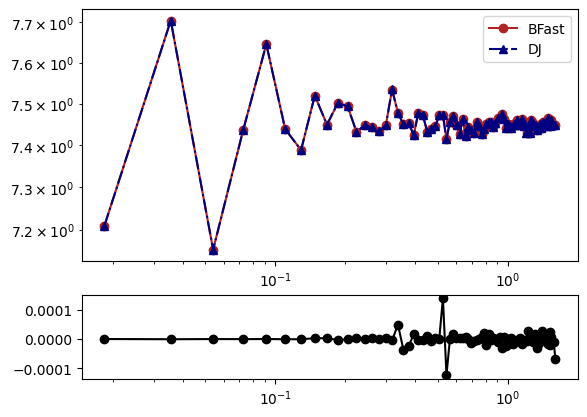

In [43]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})
axs[0].loglog(k, Pk0, "-", marker="o", color="firebrick", label="BFast")
axs[0].loglog(k_dj, Pk_dj, "-.", marker="^", color="navy", label="DJ")
axs[0].legend()
axs[1].semilogx(k, Pk0 / Pk_dj - 1.0, "k-", marker="o", label="Relative Deviation")


In [46]:
jnp.abs(Pk0 / Pk_dj - 1.0).max()

Array(0.00013947, dtype=float32)

In [53]:
xpk_out = BFast.Pk_cross(f1, f2, boxsize=boxsize, bin_edges=bins_Pk, jit=True)
k_xy, Pxy0, r = xpk_out["k"], xpk_out["Pxy0"], xpk_out["r"]

In [54]:
k_dx_dj, r_dj, Px0_dj, Py0_dj = dj.evaluate_cross_power_spectrum(f1, f2, tuple((2*bins_Pk/dj.res * dj.k_nyquist).tolist()), deconvolve=False, try_to_jit=True)

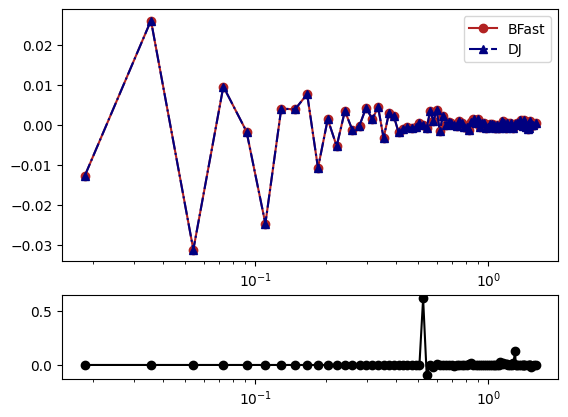

In [55]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})
axs[0].semilogx(k_xy, r_dj, "-", marker="o", color="firebrick", label="BFast")
axs[0].semilogx(k_dx_dj, r_dj, "-.", marker="^", color="navy", label="DJ")
axs[0].legend()
axs[1].semilogx(k_xy, r / r_dj - 1.0, "k-", marker="o", label="Relative Deviation")


In [59]:
jnp.abs(r - r_dj).max()

Array(7.8391924e-05, dtype=float32)